In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('sales_train.csv')
df['income'] = df['item_price']*df['item_cnt_day']

shops = pd.read_csv('shops.csv')
shops['income'] = pd.Series([df[df['shop_id'] == i]['income'].sum() for i in range(1,60)])

items = pd.read_csv('items.csv')
items['income'] = pd.Series([df[df['item_id'] == i]['income'].sum() for i in range(1,22170 )])

<BarContainer object of 60 artists>

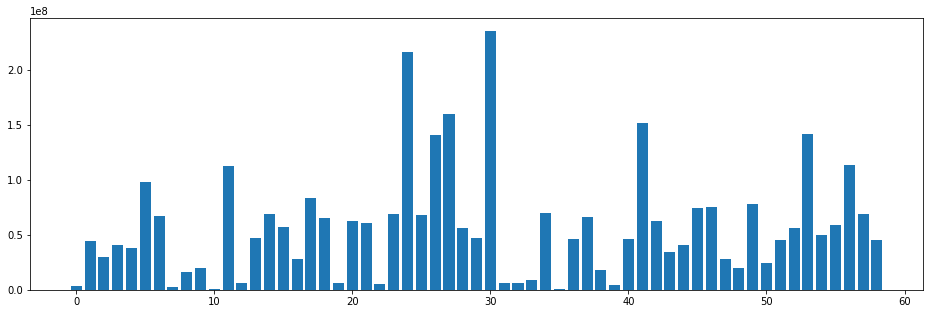

In [34]:
fig = plt.figure(figsize=(16, 5))

plt.bar(shops['shop_id'], shops['income'])

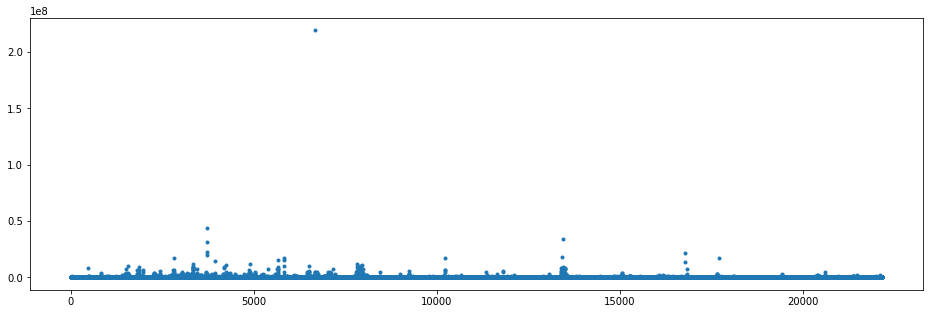

In [35]:
fig = plt.figure(figsize=(16, 5))

plt.plot(items['item_id'], items['income'],'.')

In [36]:
df[(df['shop_id'] == 4)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income
30072,12.01.2013,0,4,5605,489.3,1.0,489.3
30073,03.01.2013,0,4,5587,199.0,1.0,199.0
30074,27.01.2013,0,4,5588,149.0,1.0,149.0
30075,21.01.2013,0,4,5613,6190.0,1.0,6190.0
30076,08.01.2013,0,4,5627,2390.0,1.0,2390.0
...,...,...,...,...,...,...,...
2918122,28.10.2015,33,4,1586,5999.0,1.0,5999.0
2918123,05.10.2015,33,4,1523,799.0,1.0,799.0
2918124,03.10.2015,33,4,1535,1999.0,1.0,1999.0
2918125,01.10.2015,33,4,1325,449.0,1.0,449.0


In [47]:
df['date'] =  (pd.to_datetime(df['date']))

In [45]:
for i in range(len(df['date'])):
    df['date'][i] = df['date'][i].date()

KeyboardInterrupt: 

#### 

In [8]:
prices = df.groupby([df.date.dt.floor('1d')])

In [64]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income
0,2013-02-01,0,59,22154,999.00,1.0,999.00
1,2013-03-01,0,25,2552,899.00,1.0,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [65]:
items.head()

,item_name,item_id,item_category_id,income
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,26940.0
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,116.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,158.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,58.0
4,***КОРОБКА (СТЕКЛО) D,4,40,28.0


In [79]:
d = pd.DataFrame(items['item_category_id'], index =items['item_id'] )
d

,item_category_id
item_id,
0,40
1,76
2,40
3,40
4,40
...,...
22165,31
22166,54
22167,49


In [83]:
len(set(d['item_category_id']))

84

In [84]:
it = df['item_id'].to_numpy().tolist()

d['item_category_id'][it]

item_id
22154    37
2552     58
2552     58
2554     58
2555     56
         ..
7409     55
7460     55
7459     55
7440     57
7460     55
Name: item_category_id, Length: 2935849, dtype: int64

In [77]:
items[items['item_id'] in it]

KeyError: False

In [10]:
df[df['shop_id'] == 1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income
41348,2013-01-14,0,1,8070,137.0,1.0,137.0
41349,2013-01-20,0,1,11415,70.0,1.0,70.0
41350,2013-11-01,0,1,11435,110.0,1.0,110.0
41351,2013-01-29,0,1,11441,75.0,1.0,75.0
41352,2013-01-20,0,1,11450,249.0,1.0,249.0
...,...,...,...,...,...,...,...
180691,2013-10-02,1,1,4163,1088.0,2.0,2176.0
180692,2013-08-02,1,1,4163,1088.0,2.0,2176.0
180693,2013-07-02,1,1,4163,1088.0,1.0,1088.0
180694,2013-06-02,1,1,4163,1088.0,1.0,1088.0


In [11]:
df.sort_values('date').groupby([df.date.dt.floor('1d')]).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income
109593,2013-01-01,0,46,18616,349.0,1.0,349.0
85162,2013-01-01,0,54,11854,199.0,1.0,199.0
18128,2013-01-01,0,28,4906,1799.0,1.0,1799.0
112216,2013-01-01,0,42,2931,99.0,1.0,99.0
85141,2013-01-01,0,54,11604,349.0,1.0,349.0
...,...,...,...,...,...,...,...
2887180,2015-12-10,33,42,1546,2999.0,1.0,2999.0
2887419,2015-12-10,33,42,3350,2999.0,-1.0,-2999.0
2886297,2015-12-10,33,42,17666,1549.0,1.0,1549.0
2886262,2015-12-10,33,42,11071,199.0,1.0,199.0


In [53]:
etalon = pd.date_range(start = '2013, Jan 01', end = '2015, Dec 10', freq = None)
etalon

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10'],
              dtype='datetime64[ns]', length=1074, freq='D')

In [49]:
etalon[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [60]:


serieses_shops = []
col = ['date','income']
for i in range(len(set(df['shop_id']))):
    
    ser = df[df['shop_id'] == i]
    
    
    
    #for et in etalon:
     #   if et in ser.index:
      #      None
       # else:
        #    b = pd.Series({'date' : et, 'income' : 0})
         #   ser= ser.append(b)
    serieses_shops.append(ser.sort_values('date').groupby([df.date.dt.floor('1d')])[col].agg( income = pd.NamedAgg(column = 'income', aggfunc = 'sum')))


In [59]:
serieses_shops[0].index[0]

ValueError: could not convert string to Timestamp

In [54]:
serieses_shops[0]

,income
date,
2013-01-02,149282.0
2013-01-13,90495.0
2013-01-14,62599.0
2013-01-15,81450.0
2013-01-16,53509.0
2013-01-17,67057.0
2013-01-18,114006.0
2013-01-19,137022.0
2013-01-20,99165.0


In [23]:
serieses_shops[19].index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10'],
              dtype='datetime64[ns]', name='date', length=1031, freq=None)

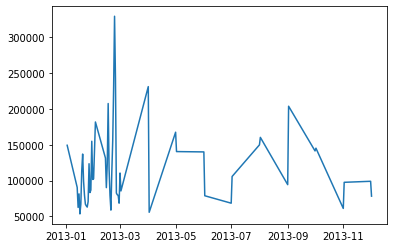

In [24]:
plt.plot(serieses_shops[0].index,serieses_shops[0]['income'])

In [ ]:
incomes = []

In [61]:
len(set(df['item_id']))

21807

In [62]:
len(set(df['shop_id']))

60

In [63]:
serieses_items = []
col = ['date','income']
for i in range(len(set(df['item_id']))):  
    ser = df[df['item_id'] == i]
    serieses_items.append(ser.sort_values('date').groupby([df.date.dt.floor('1d')])[col].agg( income = pd.NamedAgg(column = 'income', aggfunc = 'sum')))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156


KeyboardInterrupt: 

In [27]:
serieses_shops[0].index[0]

Timestamp('2013-01-02 00:00:00')

In [28]:
etalon[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [32]:
s = pd.DataFrame({'date' : etalon, 'income' : },ignore_index = True)

KeyError: Timestamp('2013-01-02 00:00:00', freq='D')

In [85]:
cat = pd.read_csv('item_categories.csv')

In [88]:
cat['item_category_name'][19]

'Игры - PS3'

In [89]:
shops

,shop_name,shop_id,income
0,"!Якутск Орджоникидзе, 56 фран",0,3.238207e+06
1,"!Якутск ТЦ ""Центральный"" фран",1,4.404964e+07
2,"Адыгея ТЦ ""Мега""",2,3.014085e+07
3,"Балашиха ТРК ""Октябрь-Киномир""",3,4.053965e+07
4,"Волжский ТЦ ""Волга Молл""",4,3.816043e+07
5,"Вологда ТРЦ ""Мармелад""",5,9.806745e+07
6,"Воронеж (Плехановская, 13)",6,6.695766e+07
7,"Воронеж ТРЦ ""Максимир""",7,2.349358e+06
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,1.637284e+07
9,Выездная Торговля,9,1.941028e+07
